In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("yelp_labelled.txt"
            )
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['review', 'positive']

In [3]:
yelp_raw.head(n=25)

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
keywords = ['love', 'great', 'best', 'amazing','second', 'must', 'recommended', 'highly', 'quickly']

for key in keywords:
        #add spaces aroung the key so we're getting the word and not just pattern matching??
        yelp_raw[str(key)] = yelp_raw.review.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )


In [5]:
yelp_raw.head(n=100)

,review,positive,love,great,best,amazing,second,must,recommended,highly,quickly
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,0,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),0,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,0,False,False,False,False,False,False,False,False,False
8,The fries were great too.,1,False,True,False,False,False,False,False,False,False
9,A great touch.,1,False,True,False,False,False,False,False,False,False


In [6]:
#turn the positive column into boolean
#yelp_raw['positive'] = (yelp_raw['positive'] == 'positive')

In [7]:
yelp_raw.dtypes

review         object
positive        int64
love             bool
great            bool
best             bool
amazing          bool
second           bool
must             bool
recommended      bool
highly           bool
quickly          bool
dtype: object

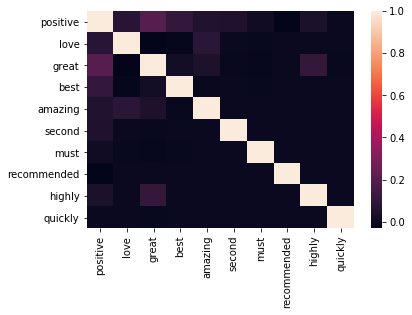

In [8]:
sns.heatmap(yelp_raw.corr())

In [9]:
data = yelp_raw[keywords]
target = yelp_raw['positive']

In [10]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], 
    (target !=y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 432
